In [1]:
!pip install --upgrade fasttext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 68 kB 3.1 MB/s 
  Using cached pybind11-2.10.1-py3-none-any.whl (216 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp37-cp37m-linux_x86_64.whl size=3156997 sha256=a456ca381cfce8170119c862990cd0948369373e9c0ff378859a885424324626
  Stored in directory: /root/.cache/pip/wheels/4e/ca/bf/b020d2be95f7641801a6597a29c8f4f19e38f9c02a345bab9b
Successfully built fasttext


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt

import fasttext

In [5]:
# load dataset
# dataset from https://www.kaggle.com/datasets/yash612/stockmarket-sentiment-dataset
data = pd.read_csv('/content/drive/MyDrive/Data Mining/dataset.csv')
data

,Tweet,label
0,di saat cowok usaha lacak perhati gue kamu lan...,1
1,telat beri tau kamu edan sarap gue gaul cigax ...,0
2,41 kadang pikir percaya tuhan jatuh kali kadan...,0
3,ku tau mata sipit lihat,0
4,kaum cebong kafir sudah lihat dongok dungu haha,2
...,...,...
13164,bicara ndasmu congor kamu yang sekata kata anjing,1
13165,kasur kunyuk,0
13166,hati hati bisu lagi bosan duh,0
13167,bom real mudah deteksi bom kubur dahsyat ledak...,0


In [6]:
for i in range(len(data)):
    if(type(data['Tweet'][i]) == float):
        data.drop(i,axis=0,inplace=True)

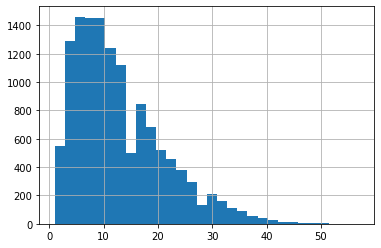

In [7]:
# get length of all the messages in the train set
seq_len = [len(i.split()) for i in data['Tweet']]

pd.Series(seq_len).hist(bins = 30)

In [8]:
#add __label__ in front of the labels for fastText to read
#df.iloc[:,1] #select category column
df_labeled = data.copy()
df_labeled['label'] = '__label__' + df_labeled['label'].astype(str)
df_labeled.head()

,Tweet,label
0,di saat cowok usaha lacak perhati gue kamu lan...,__label__1
1,telat beri tau kamu edan sarap gue gaul cigax ...,__label__0
2,41 kadang pikir percaya tuhan jatuh kali kadan...,__label__0
3,ku tau mata sipit lihat,__label__0
4,kaum cebong kafir sudah lihat dongok dungu haha,__label__2


In [10]:
#put category and product_title together
#format I want: __label__ product
category_prod = df_labeled['label'] + " " + df_labeled['Tweet']
print(category_prod)

0        __label__1 di saat cowok usaha lacak perhati g...
1        __label__0 telat beri tau kamu edan sarap gue ...
2        __label__0 41 kadang pikir percaya tuhan jatuh...
3                       __label__0 ku tau mata sipit lihat
4        __label__2 kaum cebong kafir sudah lihat dongo...
                               ...                        
13164    __label__1 bicara ndasmu congor kamu yang seka...
13165                              __label__0 kasur kunyuk
13166             __label__0 hati hati bisu lagi bosan duh
13167    __label__0 bom real mudah deteksi bom kubur da...
13168                 __label__1 situ beri foto kutil onta
Length: 13119, dtype: object


In [11]:
type(category_prod)

pandas.core.series.Series

In [13]:
#split into train and test
train, test = train_test_split(category_prod, test_size=0.3, train_size=0.7, random_state=42)


In [58]:
#write test and train into files
f_train = open("train.txt", "a")
for i in range(len(np.array(train))):
    f_train.write(np.array(train)[i] + "\n")
f_train.close()

label_test = []
tweet_test = []
for texts in test:
  label_test.append(texts.split(' ')[0])
  tweet_test.append(texts.replace(texts.split(' ')[0]+' ', ''))

Default (Model = unigram)

In [59]:
#train model
model = fasttext.train_supervised(input="train.txt", epoch=50)

In [60]:
label_predict1 = []
for tweet in tweet_test:
    label_predict1.append(model.predict(tweet)[0][0])

In [61]:
from sklearn.metrics import classification_report

print(classification_report(label_test, label_predict1))

              precision    recall  f1-score   support

  __label__0       0.83      0.82      0.82      2263
  __label__1       0.57      0.56      0.57       986
  __label__2       0.44      0.49      0.46       512
  __label__3       0.72      0.62      0.66       175

    accuracy                           0.70      3936
   macro avg       0.64      0.62      0.63      3936
weighted avg       0.71      0.70      0.70      3936



Tuning the Model (Model = wordNgrams)

In [62]:
#wordNgrams=2
model2 = fasttext.train_supervised(input="train.txt", wordNgrams=2, epoch=50)

In [64]:
label_predict2 = []
for tweet in tweet_test:
    label_predict2.append(model2.predict(tweet)[0][0])

In [65]:
print(classification_report(label_test, label_predict2))

              precision    recall  f1-score   support

  __label__0       0.84      0.89      0.86      2263
  __label__1       0.65      0.65      0.65       986
  __label__2       0.62      0.49      0.54       512
  __label__3       0.83      0.66      0.74       175

    accuracy                           0.77      3936
   macro avg       0.73      0.67      0.70      3936
weighted avg       0.76      0.77      0.76      3936

